<a href="https://colab.research.google.com/github/jiho-kang/Data_Analysis_Project/blob/main/Video%20Game%20Sales/data_analysis_for_new_game_launching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 다음 분기에 어떤 게임을 설계해야 할까
다음 분기에 어떤 게임을 설계해야 할까를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.
데이터셋을 읽는 것 부터, 이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성



> Name : 게임의 이름입니다.

> Platform : 게임이 지원되는 플랫폼의 이름입니다.

> Year : 게임이 출시된 연도입니다.

> Genre : 게임의 장르입니다.

> Publisher : 게임을 제작한 회사입니다.

> NA_Sales : 북미지역에서의 출고량입니다.

> EU_Sales : 유럽지역에서의 출고량입니다.

> JP_Sales : 일본지역에서의 출고량입니다.

> Other_Sales : 기타지역에서의 출고량입니다.

* 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

* 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

* 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.








In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import files
files.upload()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 전처리
1. 결측치 처리
2. year 데이터 전처리
3. sales열 단위 맞추기 & numeric으로 변경
4. Total sales열 만들기

#####0. 파일 불러오기



In [3]:
import pandas as pd

# 파일 불러오기
df_ori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')

# 0열 제거
df_ori = df_ori.iloc[:,1:]
df_ori

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#####1. 결측치 처리
- Year 데이터의 최댓값은 2020이므로 9999로 대체, Year 결측 데이터: 271개
- 기타 결측치: Unknown

In [4]:
df = df_ori.copy()
df.duplicated(keep = 'first')
df.Year.fillna(9999,inplace=True)
df.fillna("Unknown",inplace=True)

#####2. Year 데이터 전처리
- 결측치 -> 0
- 기타 > 1950년 으로 수정
- data_type to int


In [5]:
for i in df[df.Year<50].index:
  df.Year.iloc[i] += 2000

for i in df[(50<=df.Year) & (df.Year<=99)].index:
  df.Year.iloc[i] += 1900

for i in df[df.Year == 9999].index:
  df.Year.iloc[i] = 0

df.Year = df.Year.astype(int)
df = df.sort_values('Year',ascending=False)
df.reset_index(drop=True,inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0,0,0.03,0
...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0,0,0
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0,0,0
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0,0.04
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.1,0,0.02


#####3. sales열 단위 맞추기 & numeric으로 변경
- 'k'와 'm' 제거 및 m단위로 통일
-type to float

In [6]:
def tofloat(n):
  try:
    float(n)
  except:
    if 'M' in n:
      n = n[:-1]
    elif "K" in n:
      n = float(n[:-1])/1000
  return n

df['NA_Sales'] = df['NA_Sales'].apply(tofloat).astype(float)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat).astype(float)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat).astype(float)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat).astype(float)

#####4. Total sales열 만들기

In [7]:
df['Total_Sales'] = df[df.columns[5:]].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


#####**결과**

In [8]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  int64  
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
 9   Total_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


## 지역별 선호하는 장르는 다를까?
1. 지역과 장르의 chi-square test를 통해 둘 사의 연관성 파악
2. 지역별 장르 선호도 시각화

#####**1. 지역과 장르의 chi-square test를 통해 둘 사이의 연관성 파악**
귀무가설: 지역과 장르는 독립적이다.

p값 (2.5083350323528106e-125)은 0.05보다 작으므로 귀무가설을 기각한다.

즉, **지역과 장르는 독립적이지 않고 연관성이 있다**고 할 수 있다.


In [9]:
from scipy.stats import chi2_contingency
print('')

# 장르별 지역 sales의 합을 위한 전처리
loca_genre = df.groupby('Genre').sum().iloc[:-1,1:]

# chi-square test 실행
loca_genre_chi2 = chi2_contingency(loca_genre,correction=False)
print(loca_genre_chi2)


(696.7959761665402, 2.482194832182736e-118, 44, array([[ 858.96895075,  475.6200157 ,  251.09725564,  155.6337779 ,
        1741.32      ],
       [ 117.63393614,   65.13513033,   34.38722495,   21.31370858,
         238.47      ],
       [ 221.18948701,  122.47491273,   64.65899974,   40.07660052,
         448.4       ],
       [ 394.49075948,  218.43362447,  115.31912416,   71.47649189,
         799.72      ],
       [ 409.54091837,  226.76705352,  119.71864709,   74.20338101,
         830.23      ],
       [ 120.10036664,   66.50081847,   35.10822183,   21.76059306,
         243.47      ],
       [ 359.00869034,  198.78683483,  104.94686312,   65.04761171,
         727.79      ],
       [ 446.43871862,  247.19774815,  130.50476034,   80.88877289,
         905.03      ],
       [ 510.99507046,  282.94326963,  149.37613254,   92.58552738,
        1035.9       ],
       [ 193.11657509,  106.93065028,   56.45261331,   34.99016132,
         391.49      ],
       [ 654.61038546,  362.464

#####**2. 지역별 장르 선호도 시각화**
[NA, EU, Others]
- Top3 장르: Actoin, Sports, Shooter
- 최하위 장르: Role-Playing

[JP]
- Top 장르: Role-Playing이 압도적

In [10]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
1,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
2,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
3,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
4,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...
16593,PDC World Championship Darts 2008,DS,0,Sports,Unknown,0.01,0.00,0.00,0.00,0.01
16594,Dinotopia: The Sunstone Odyssey,GC,0,Action,Unknown,0.01,0.00,0.00,0.00,0.01
16595,LEGO Harry Potter: Years 5-7,3DS,0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0.00,0.04,0.41
16596,Def Jam: Fight for NY,XB,0,Fighting,Electronic Arts,0.43,0.10,0.00,0.02,0.55


In [11]:
loca_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,874.81,522.16,157.90,186.45,1741.32
Adventure,105.66,64.05,51.95,16.81,238.47
Fighting,223.20,101.22,87.34,36.64,448.40
Misc,408.05,212.36,105.27,74.04,799.72
Platform,446.44,201.61,130.65,51.53,830.23
Puzzle,123.35,50.73,56.87,12.52,243.47
Racing,357.19,237.10,56.40,77.10,727.79
Role-Playing,319.54,183.58,344.95,56.96,905.03
Shooter,581.92,313.05,38.28,102.65,1035.90


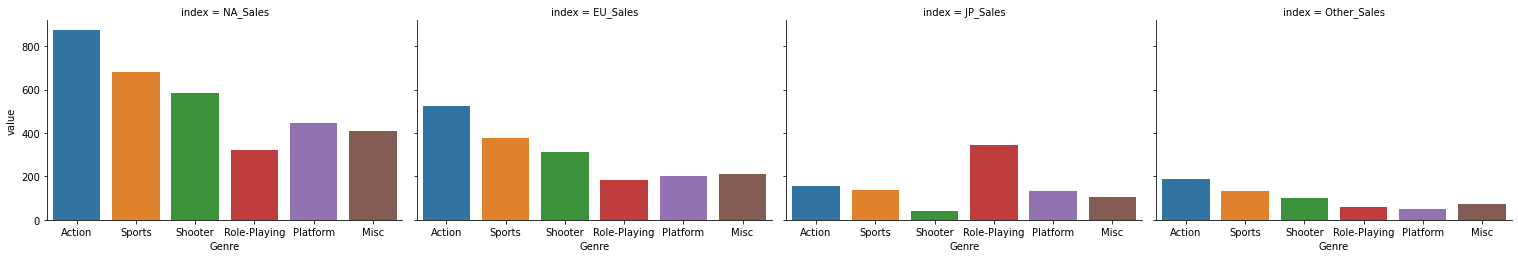

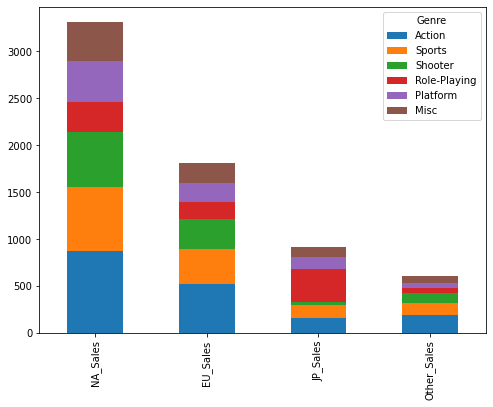

In [12]:
# 판매량이 높은 장르 6개만 추출
loca_genre = df.groupby('Genre').sum().iloc[:-1,1:]
loca_genre = loca_genre.sort_values('Total_Sales',ascending=False)
loca_genre = loca_genre.iloc[:6,:-1]

# 시각화를 위한 전처리
loca_genre_T = loca_genre.T
loca_genre_T.reset_index(inplace=True)
loca_genre_T_tidy = loca_genre_T.melt(id_vars = 'index', value_vars = loca_genre_T.columns[1:])

# 시각화
import seaborn as sns
lg = sns.catplot(x = 'Genre', y = 'value', col = 'index', kind = 'bar', data = loca_genre_T_tidy, height = 3.5, aspect = 1.5);
# ax = lg.facet_axis(0,0)
# for p in ax.patches:
#   ax.text(p.get_x() + 0.1,
#           p.get_height() * 1.02,
#           round(p.get_height(),0),
#           color = 'black',
#           size = 'large',
#           rotation = 'horizontal')

loca_genre.T.plot.bar(stacked=True,figsize=(8,6));

## 연도별 게임의 트렌드가 있을까?
1. 연도별 장르 트렌드
2. 연도별 플랫폼 트렌드
3. 연도별 판매량이 높은 게임



##### 1. 연도별 장르 트렌드

**[chi-square test]**

귀무가설: 연도와 장르는 독립적이다.

p값 (0.0)은 0.05보다 작으므로 귀무가설을 기각한다.

즉, **연도와 장르는 독립적이지 않고 연관성이 있다**고 할 수 있다

In [14]:
from scipy.stats import chi2_contingency

# 연도와 장르별 데이터 전처리: 2017년부터는 데이터 규모가 작아 분석에 방해가 되므로 삭제
year_genre = pd.DataFrame(df.pivot_table(index='Year',columns='Genre',values='Total_Sales',aggfunc=['sum'], fill_value=0, margins=True))
year_genre = year_genre.iloc[1:-3,:-2]

# chi-square test 실행
year_genre_chi2 = chi2_contingency(year_genre,correction=False)
print(year_genre_chi2[1])

0.0


In [15]:
year_genre.sort_values('Year',ascending=False)

sum                            ...                                    
Genre  Action Adventure Fighting   Misc  ... Shooter Simulation  Sports Strategy
Year                                     ...                                    
2016    19.85      1.81     3.85   1.15  ...   18.17       0.39   14.63     0.52
2015    68.25      8.01     7.78  11.66  ...   66.12       5.61   41.49     1.82
2014    99.01      6.09    16.15  23.73  ...   65.99       5.54   46.64     0.97
2013   125.21      6.61     7.23  25.66  ...   62.73       8.68   41.54     6.32
2012   120.81      5.90     9.53  22.93  ...   72.84      13.37   30.90     3.33
2011   119.00     15.88    22.11  55.77  ...   99.35      15.33   57.06     9.03
2010   117.50     16.57    14.88  88.40  ...   77.44      22.06   92.02    13.82
2009   138.32     20.67    32.18  76.90  ...   69.84      33.55  138.59    12.51
2008   135.46     24.91    35.41  86.18  ...   59.51      46.40   95.24    11.70
2007   105.99     24.44    17.63  92.28  ...   70.88      48.85   98.24     9.38
2006    66.49     11.48    22.53  67.23  ...   38.35      21.73  136.12     4.23
2005    85.52      8.53    19.68  61.13  ...   41.57      49.28   59.53     5.34
2004    76.15      8.63    16.76  31.16  ...   46.92      10.89   61.11     7.14
2003    67.98      2.12    23.79  23.79  ...   27.10      21.21   55.96     7.95
2002    86.65     11.07    24.92  15.63  ...   47.64      10.82   65.31     5.51
2001    56.68      8.96    18.10  16.39  ...   24.81      19.54   51.47     7.54
2000    33.89      2.96    20.26  15.55  ...    6.83       3.37   41.24     8.52
1999    27.62      7.61    14.31  20.68  ...   12.23      11.46   30.21    18.47
1998    39.41      9.04    31.68  11.84  ...    9.80       7.11   41.75    13.49
1997    27.59      4.97    11.80   5.68  ...   22.16       9.64   30.04     7.72
1996    20.60      4.18    18.04  10.66  ...    6.90      11.33   17.42     5.61
1995     3.58      0.71    14.84   6.39  ...    4.15       4.17    7.99     6.54
1994     1.55      3.74     8.47   2.86  ...    8.30       2.72    8.41     3.57
1993     1.81      0.07     8.75   0.30  ...    3.08       0.19    3.18     0.81
1992     3.84     12.24    15.23   4.94  ...    0.28       2.14    2.95     0.36
1991     6.76      2.24     0.39   0.08  ...    1.99       2.15    2.41     0.94
1990     6.39      0.00     0.00   0.00  ...    0.00       1.13    2.11     0.00
1989     4.65      0.00     0.00   1.28  ...    1.19       0.00    5.72     0.00
1988     1.74      0.00     0.00   0.00  ...    0.51       0.03    3.60     0.00
1987     1.11      4.38     5.42   0.00  ...    0.69       0.00    3.71     0.00
1986    13.74      0.00     0.00   0.00  ...    3.89       0.00    5.58     0.00
1985     3.52      0.00     1.05   0.00  ...    1.00       0.04    1.96     0.00
1984     1.85      0.00     0.00   1.45  ...   31.10       0.00    6.17     0.00
1983     2.86      0.40     0.00   2.14  ...    0.49       0.00    3.20     0.00
1982     6.50      0.00     0.00   0.87  ...    3.81       0.00    1.06     0.00
1981    14.79      0.00     0.00   0.00  ...   10.02       0.44    0.78     0.00
1980     0.34      0.00     0.77   2.70  ...    7.07       0.00    0.00     0.00

[37 rows x 12 columns]

**[연도별 장르 트렌드 시각화]**

과거의 데이터 보다는 최근 10년 동안을 더 자세하게 살펴보는게 좋다고 생각하여 최근 10개년만 가져옴

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


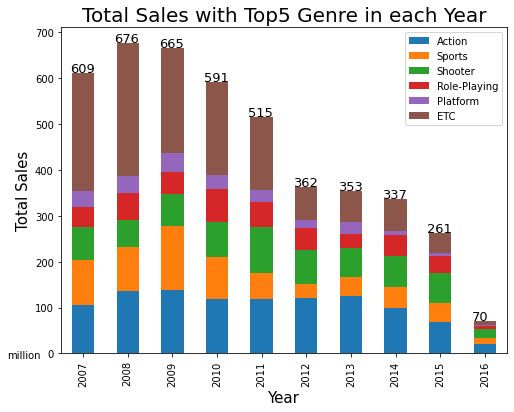

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

yg_10year = year_genre[-10:]

yg_10year_head = []
for i in range(len(yg_10year.columns)):
  yg_10year_head.append(yg_10year.columns[i][1])
yg_10year.columns = yg_10year_head

yg_10year.loc['All'] = yg_10year.sum()
yg_10year.sort_values(by='All',axis=1,ascending=False, inplace=True)

yg_graph = yg_10year.iloc[:-1,:5]
yg_graph['ETC'] = yg_10year.iloc[:-1,5:].sum(axis=1)


yg_graph.plot.bar(stacked=True,figsize=(8,6))
plt.title('Total Sales with Top5 Genre in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yg_graph.index)):
  plt.text(i-0.3,yg_graph.iloc[i,:].sum()+2,int(yg_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

plt.show();

In [33]:
year_genre.sum()

     Genre       
sum  Action          1713.01
     Adventure        234.22
     Fighting         443.54
     Misc             787.41
     Platform         828.01
     Puzzle           240.74
     Racing           722.56
     Role-Playing     901.48
     Shooter         1024.75
     Simulation       389.17
     Sports          1305.34
     Strategy         173.14
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


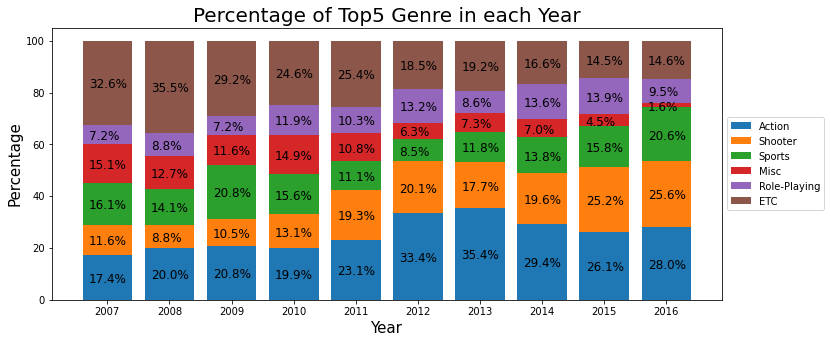

In [18]:
from matplotlib import pyplot as plt
import numpy as np

yg_ind = yg_graph.index
yg_col = yg_graph.columns

yg_graph_100 = pd.DataFrame(index = yg_ind, columns=yg_col)
yg_graph_100
for i in range(len(yg_ind)):
  yg_graph_100.iloc[i] = yg_graph.iloc[i]/yg_graph.iloc[i].sum()

yg_graph_100



topics = yg_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(12,5))
for i in range(len(yg_col)):
  plt.bar(x,yg_graph_100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yg_graph_100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Percentage of Top5 Genre in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yg_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yg_ind)):
  sum = 0
  value = 0
  for j in range(len(yg_col)):
    sum += yg_graph_100.iloc[i,j]*100
    value =round(yg_graph_100.iloc[i,j]*100,2)
    plt.text(x[i]-0.3,sum - (yg_graph_100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

In [ ]:
platfrom_genre = df.pivot_table(index='Platform',columns = 'Genre',values='Name', aggfunc=['count'], fill_value=0,margins=True)
platfrom_genre.sort_values(platfrom_genre.columns[-1],ascending=False)

In [ ]:
'NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales'

##### 2. 연도별 플렛폼 트렌드

**[chi-square test]**

귀무가설: 연도와 플랫폼는 독립적이다.

p값 (0.0)은 0.05보다 작으므로 귀무가설을 기각한다.

즉, **연도와 장르는 독립적이지 않고 연관성이 있다**고 할 수 있다

In [101]:
from scipy.stats import chi2_contingency

# 연도와 장르별 데이터 전처리: 2017년부터는 데이터 규모가 작아 분석에 방해가 되므로 삭제
year_platform = pd.DataFrame(df.pivot_table(index='Year',columns='Platform',values='Total_Sales',aggfunc=['sum'], fill_value=0, margins=True))

# chi-square test 실행
year_platform_chi2 = chi2_contingency(year_platform,correction=False)
print('year_platform chi-square test, pvalue:', year_platform_chi2[1])


year_platform chi-square test, pvalue: 0.0


**[연도별 장르 트렌드 시각화]**

과거의 데이터 보다는 최근 10년 동안을 더 자세하게 살펴보는게 좋다고 생각하여 최근 10개년만 가져옴

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# 최근 10년치의 자료만 가져옴
yp_10year = year_platform.iloc[-13:-3,:-1]

yp_10year_head = []
for i in range(len(yp_10year.columns)):
  yp_10year_head.append(yp_10year.columns[i][1])
yp_10year.columns = yp_10year_head

# 10년동안 가장 많은 platform sales를 기준으로 정렬
yp_10year.loc['All'] = yp_10year.sum()
yp_10year.sort_values(by='All',axis=1,ascending=False, inplace=True)

yp_graph = yp_10year.iloc[:-1,:10]
yp_graph['ETC'] = yp_10year.iloc[:-1,10:].sum(axis=1)


yp_graph.plot.bar(stacked=True,figsize=(8,10))
plt.title('Total Sales with Top10 Platform in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Total Sales',fontsize=15)

for i in range(len(yp_graph.index)):
  plt.text(i-0.3,yp_graph.iloc[i,:].sum()+2,int(yp_graph.iloc[i,:].sum()), size = 13)

plt.text(-1.7,-10,s='million')

plt.show();


In [84]:
yg_10year

,Action,Shooter,Sports,Misc,Role-Playing,Racing,Platform,Simulation,Fighting,Adventure,Puzzle,Strategy
Year,,,,,,,,,,,,
2007,105.99,70.88,98.24,92.28,43.86,38.95,35.53,48.85,17.63,24.44,23.78,9.38
2008,135.46,59.51,95.24,86.18,59.69,70.73,35.65,46.40,35.41,24.91,15.53,11.70
2009,138.32,69.84,138.59,76.90,47.96,34.09,40.95,33.55,32.18,20.67,20.28,12.51
2010,117.50,77.44,92.02,88.40,70.56,34.93,31.98,22.06,14.88,16.57,11.15,13.82
2011,119.00,99.35,57.06,55.77,53.32,34.97,28.12,15.33,22.11,15.88,5.10,9.03
2012,120.81,72.84,30.90,22.93,47.77,14.43,18.56,13.37,9.53,5.90,1.74,3.33
2013,125.21,62.73,41.54,25.66,30.54,13.02,25.09,8.68,7.23,6.61,1.00,6.32
2014,99.01,65.99,46.64,23.73,45.89,16.71,8.87,5.54,16.15,6.09,1.51,0.97
2015,68.25,66.12,41.49,11.66,36.43,7.92,6.05,5.61,7.78,8.01,0.69,1.82


In [68]:

df.pivot_table(index='Year',columns='Platform',values='Total_Sales',aggfunc=['sum'], fill_value=0, margins=True)

sum                       ...                                 
Platform   2600   3DO     3DS     DC  ...    X360      XB    XOne      All
Year                                  ...                                 
0         10.50  0.00    1.19   0.00  ...   10.29    6.17    0.00    99.99
1980      11.38  0.00    0.00   0.00  ...    0.00    0.00    0.00    11.38
1981      35.68  0.00    0.00   0.00  ...    0.00    0.00    0.00    35.68
1982      28.88  0.00    0.00   0.00  ...    0.00    0.00    0.00    28.88
1983       5.84  0.00    0.00   0.00  ...    0.00    0.00    0.00    16.80
1984       0.27  0.00    0.00   0.00  ...    0.00    0.00    0.00    50.35
1985       0.45  0.00    0.00   0.00  ...    0.00    0.00    0.00    53.95
1986       0.67  0.00    0.00   0.00  ...    0.00    0.00    0.00    37.08
1987       1.94  0.00    0.00   0.00  ...    0.00    0.00    0.00    21.70
1988       0.74  0.00    0.00   0.00  ...    0.00    0.00    0.00    47.21
1989       0.63  0.00    0.00   0.00  ...    0.00    0.00    0.00    73.45
1990       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00    49.37
1991       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00    32.23
1992       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00    76.14
1993       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00    45.99
1994       0.00  0.02    0.00   0.00  ...    0.00    0.00    0.00    79.22
1995       0.00  0.08    0.00   0.00  ...    0.00    0.00    0.00    88.11
1996       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00   199.15
1997       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00   201.07
1998       0.00  0.00    0.00   3.38  ...    0.00    0.00    0.00   256.33
1999       0.00  0.00    0.00   5.16  ...    0.00    0.00    0.00   251.12
2000       0.00  0.00    0.00   5.99  ...    0.00    0.99    0.00   201.63
2001       0.00  0.00    0.00   1.07  ...    0.00   22.26    0.00   331.49
2002       0.00  0.00    0.00   0.29  ...    0.00   48.01    0.00   394.97
2003       0.00  0.00    0.00   0.00  ...    0.00   55.04    0.00   357.61
2004       0.00  0.00    0.00   0.00  ...    0.00   65.42    0.00   418.85
2005       0.00  0.00    0.00   0.00  ...    8.31   49.08    0.00   459.41
2006       0.00  0.00    0.00   0.00  ...   51.94   10.04    0.00   520.52
2007       0.00  0.00    0.00   0.02  ...   95.79    0.55    0.00   610.44
2008       0.00  0.00    0.00   0.04  ...  135.66    0.18    0.00   678.49
2009       0.00  0.00    0.00   0.00  ...  120.92    0.00    0.00   667.10
2010       0.00  0.00    0.00   0.00  ...  170.95    0.00    0.00   600.36
2011       0.00  0.00   62.58   0.00  ...  145.08    0.00    0.00   515.93
2012       0.00  0.00   51.10   0.00  ...  100.82    0.00    0.00   363.30
2013       0.00  0.00   55.86   0.00  ...   89.56    0.00   18.61   367.98
2014       0.00  0.00   43.12   0.00  ...   36.43    0.00   52.44   337.10
2015       0.00  0.00   26.97   0.00  ...   13.02    0.00   57.67   264.26
2016       0.00  0.00    6.55   0.00  ...    0.83    0.00   12.38    70.87
2017       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00     0.05
2020       0.00  0.00    0.00   0.00  ...    0.00    0.00    0.00     0.29
All       96.98  0.10  247.37  15.95  ...  979.60  257.74  141.10  8915.85

[41 rows x 32 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


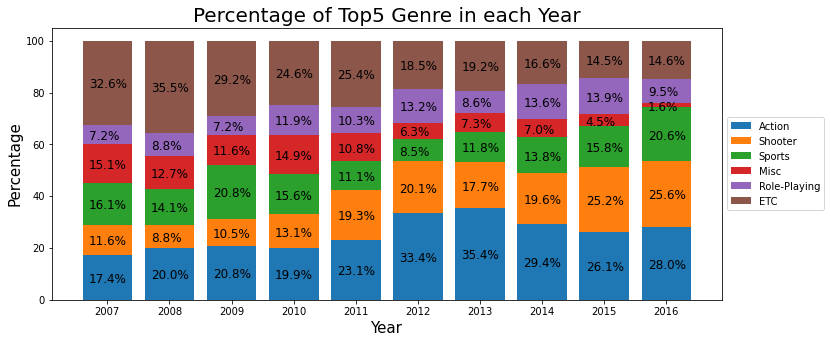

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

yg_ind = yg_graph.index
yg_col = yg_graph.columns

yg_graph_100 = pd.DataFrame(index = yg_ind, columns=yg_col)
yg_graph_100
for i in range(len(yg_ind)):
  yg_graph_100.iloc[i] = yg_graph.iloc[i]/yg_graph.iloc[i].sum()

yg_graph_100



topics = yg_ind
x = range(len(topics))
bottom = 0

plt.figure(figsize=(12,5))
for i in range(len(yg_col)):
  plt.bar(x,yg_graph_100.iloc[:,i]*100,bottom=bottom)
  bottom = np.add(yg_graph_100.iloc[:,i]*100,bottom)

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(topics)

plt.title('Percentage of Top5 Genre in each Year', fontsize=20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Percentage',fontsize=15)
plt.legend(yg_col, loc='center left',bbox_to_anchor=(1, 0.5))
plt.rc('font', family='NanumBarunGothic') 

for i in range(len(yg_ind)):
  sum = 0
  value = 0
  for j in range(len(yg_col)):
    sum += yg_graph_100.iloc[i,j]*100
    value =round(yg_graph_100.iloc[i,j]*100,2)
    plt.text(x[i]-0.3,sum - (yg_graph_100.iloc[i,j]*100/2)-2,"%0.1f%%" % value,size=12)
    
plt.show();

In [ ]:
platfrom_genre = df.pivot_table(index='Platform',columns = 'Genre',values='Name', aggfunc=['count'], fill_value=0,margins=True)
platfrom_genre.sort_values(platfrom_genre.columns[-1],ascending=False)

In [ ]:
'NA_Sales', 'EU_Sales',	'JP_Sales',	'Other_Sales'